In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.stats import weightstats as weightstats
from sklearn.model_selection import train_test_split 
from Finalproject_Group4 import csv_import
from Finalproject_Group4 import select_cols
from Finalproject_Group4 import filter_data
from Finalproject_Group4 import LinearRegressionM

# 1.1 Data Extraction

In [2]:
df1 = csv_import('https://data.ny.gov/api/views/sjc6-ftj4/rows.csv?accessType=DOWNLOAD&sorting=true',',', header = 0) ##loading csv

This dataset is managed by the National Telecommunications and Information Administration in the US Department of Commerce. The information about the availability of high-speed Internet services known as Broadband, was collected from broadband provider companies regarding the technology type and speed of services offered. 

Fiber Internet Services came to the state of New York in the early 2000. It is a high speed internet services which is cost effective as one can get it for the price of cable and DSL internet services. It was of no surprise that fiber service is the next big thing and internet providers such as verizon and AT&T wanted to establish their monopoly in the fiber internet market by offering fiber internet to the whole state of New York. The data set that we will be analyzing is from the year 2010 and we will look through the 62 counties in the state of New York to find which counties are moving towards the fiber internet by examining the Number of households having access to fiber internet. We will also analyse how population, number of household units and Area of a municipality depend with the fiber internet connections in a municpality. We will look at Regional Economic Development Council Regions to analyze our data and later we will drill down to various counties in that Regional Economic Development Council Region. Using Statistical Methods, we will test if the average number of fiber internet providers are greater than the average number of DSL internet providers and cable internet providers. We will also test if the average number of housing units with access to fiber internet is greater than average number of housing units with access cable and DSL internet. 

Lastly, we will predict Number of housing units with access to fiber internet using different pedictor variables. 

In [3]:
df1.head() ##looking at initial values

,GNIS ID,Municipality Name,Municipality Type,2010 Muni Population,2010 Muni Housing Units,Muni Area (sq mi),County,REDC Region,# Cable Providers,# Hse Units Cable,...,# Fiber Providers,# Hse Units Fiber,% Hse Units Fiber,# Wireline Providers,# Hse Units Wireline,% Hse Units Wireline,# Wireless Providers,# Hse Units Wireless,% Hse Units Wireless,# Satellite Providers
0,978655,Adams,Town,5143,2126,42.4,Jefferson,North Country Region,1,1800,...,1,0,0,3,2000,94,4,2000,94,4
1,942159,Adams,Village,1775,793,1.5,Jefferson,North Country Region,1,760,...,1,0,0,3,760,96,3,760,96,4
2,978656,Addison,Town,2595,1159,25.7,Steuben,Southern Tier Region,1,950,...,1,0,0,3,1000,86,3,1100,95,4
3,942177,Addison,Village,1763,770,1.9,Steuben,Southern Tier Region,1,740,...,1,0,0,3,740,96,2,740,96,4
4,978657,Afton,Town,2851,1457,46.7,Chenango,Southern Tier Region,2,1100,...,0,0,0,4,1400,96,6,1400,96,4


In [4]:
df1.columns ##looking at columns of dataframe

Index(['GNIS ID', 'Municipality Name', 'Municipality Type',
       '2010 Muni Population', '2010 Muni Housing Units', 'Muni Area (sq mi)',
       'County', 'REDC Region', '# Cable Providers', '# Hse Units Cable',
       '% Hse Units Cable', '# of DSL Providers', '# Hse Units DSL',
       '% Hse Units DSL', '# Fiber Providers', '# Hse Units Fiber',
       '% Hse Units Fiber', '# Wireline Providers', '# Hse Units Wireline',
       '% Hse Units Wireline', '# Wireless Providers', '# Hse Units Wireless',
       '% Hse Units Wireless', '# Satellite Providers'],
      dtype='object')

Each record in our data represents a Geographic Names Information System Identification number or GNIS ID which is the unique key. 

We have a total of 24 variables in this dataset. They are:

1) GNIS ID: Geographic Names Information System (GNIS) Identification Number

2) Municipality Name: Name of New York Municipality

3) Municipality Type: Type of Municipality (Town, City, Village, Tribal Community, County)

4) 2010 Muni Population: Total Population in the Municipality according to the 2010 US Census

5) 2010 Muni Housing Units:Total Housing Units (occupied & unoccupied households) in the Municipality according to the 2010 US Census

6) Muni Area (sq mi): Area of the Municipality in square miles

7) County: County of the Municipality

8) REDC Region: Regional Economic Development Council Regions

9) # Cable Providers: Number of Cable broadband providers by Municipality

10) # Hse Units Cable: Number of 2010 Census Housing Units with access to cable broadband (≥768 kbps download, ≥200 kbps upload) in the Municipality. This is a rounded estimate with a ±3% bias factor applied.

11) % Hse Units Cable: Percentage of 2010 Census Housing Units with access to cable broadband (≥768 kbps download, ≥200 kbps upload) in the Municipality. This is a rounded estimate with a ±3% bias factor applied.

12) # of DSL Providers: Number of DSL broadband providers by Municipality

13) # Hse Units DSL: Number of 2010 Census Housing Units with access to DSL broadband (≥768 kbps download, ≥200 kbps upload) in the Municipality. This is a rounded estimate with a ±3% bias factor applied.

14) % Hse Units DSL: Percentage of 2010 Census Housing Units with access to DSL broadband (≥768 kbps download, ≥200 kbps upload) in the Municipality. This is a rounded estimate with a ±3% bias factor applied.

15) # Fiber Providers: Number of Fiber broadband providers by Municipality (includes Business-Only providers)

16) # Hse Units Fiber: Number of 2010 Census Housing Units with access to fiber broadband (≥768 kbps download, ≥200 kbps upload) in the Municipality. This is a rounded estimate with a ±3% bias factor applied.

17) % Hse Units Fiber: Percentage of 2010 Census Housing Units with access to fiber broadband (≥768 kbps download, ≥200 kbps upload) in the Municipality. This is a rounded estimate with a ±3% bias factor applied.

18) # Wireline Providers: Number of wireline (DSL, Cable, or Fiber) broadband providers by Municipality

19) # Hse Units Wireline: Number of 2010 Census Housing Units with access to wireline (DSL, cable, or fiber) broadband (≥768 kbps download, ≥200 kbps upload) in the Municipality. This is a rounded estimate with a ±3% bias factor applied.

20) % Hse Units Wireline: Percentage of 2010 Census Housing Units with access to wireline (DSL, cable, or fiber) broadband (≥768 kbps download, ≥200 kbps upload) in the Municipality. This is a rounded estimate with a ±3% bias factor applied.

21) # Wireless Providers: Number of Wireless (Fixed or Mobile) broadband providers by Municipality

22) # Hse Units Wireless: Number of 2010 Census Housing Units with access to wireless (fixed or mobile) broadband (≥768 kbps download, ≥200 kbps upload) in the Municipality. This is a rounded estimate with a ±3% bias factor applied.

23) % Hse Units Wireless: Number of 2010 Census Housing Units with access to wireless (fixed or mobile) broadband (≥768 kbps download, ≥200 kbps upload) in the Municipality. This is a rounded estimate with a ±3% bias factor applied.

24) # Satellite Providers:Number of satellite broadband providers


# 1.2 Data Cleaning

Talking a little bit about data, we will first start by inspecting missing data in our data frame. 

In [5]:
df1.isna().sum()  ##checking for missing values

GNIS ID                    0
Municipality Name          0
Municipality Type          0
2010 Muni Population       0
2010 Muni Housing Units    0
Muni Area (sq mi)          0
County                     1
REDC Region                1
# Cable Providers          0
# Hse Units Cable          0
% Hse Units Cable          0
# of DSL Providers         0
# Hse Units DSL            0
% Hse Units DSL            0
# Fiber Providers          0
# Hse Units Fiber          0
% Hse Units Fiber          0
# Wireline Providers       0
# Hse Units Wireline       0
% Hse Units Wireline       0
# Wireless Providers       0
# Hse Units Wireless       0
% Hse Units Wireless       0
# Satellite Providers      0
dtype: int64

As we can see in the above data frame, there is one 1 missing record in county, and REDC Region. Let's further inspect that record.

In [6]:
df1[df1.County.isna()] ##checking na value

,GNIS ID,Municipality Name,Municipality Type,2010 Muni Population,2010 Muni Housing Units,Muni Area (sq mi),County,REDC Region,# Cable Providers,# Hse Units Cable,...,# Fiber Providers,# Hse Units Fiber,% Hse Units Fiber,# Wireline Providers,# Hse Units Wireline,% Hse Units Wireline,# Wireless Providers,# Hse Units Wireless,% Hse Units Wireless,# Satellite Providers
1006,9999999,New York State,Statewide,19378102,8108103,54571.0,NaN,NaN,15,7610000,...,31,3780000,47,69,7780000,96,25,7840000,97,4


From the above value, we can see that the municipality type of this record is Statewide and this record is a summarized value for all the dataset. Hence, it does not make sense to remove this record as it is one type of data and of course, if it is a statewide data, it would not have a county and a REDC Region assigned to it. Hence, NA values make sense here.

Next, we will use a subset of those features/variables that we require in our analysis.

In [7]:
columns = ['Municipality Name','Municipality Type','2010 Muni Population','2010 Muni Housing Units','Muni Area (sq mi)','County','REDC Region','# Cable Providers','# Hse Units Cable','# of DSL Providers','# Hse Units DSL','# Fiber Providers','# Hse Units Fiber']           
df1 = select_cols(df1,columns) ##using relevant columns
df1.head()

,Municipality Name,Municipality Type,2010 Muni Population,2010 Muni Housing Units,Muni Area (sq mi),County,REDC Region,# Cable Providers,# Hse Units Cable,# of DSL Providers,# Hse Units DSL,# Fiber Providers,# Hse Units Fiber
0,Adams,Town,5143,2126,42.4,Jefferson,North Country Region,1,1800,1,2000,1,0
1,Adams,Village,1775,793,1.5,Jefferson,North Country Region,1,760,1,760,1,0
2,Addison,Town,2595,1159,25.7,Steuben,Southern Tier Region,1,950,1,1000,1,0
3,Addison,Village,1763,770,1.9,Steuben,Southern Tier Region,1,740,1,740,1,0
4,Afton,Town,2851,1457,46.7,Chenango,Southern Tier Region,2,1100,2,1400,0,0


Next, we will filter out only that data that we require for our analysis. For example, since our analysis is restricted to the 62 counties of the state of New york, we will create a new data frame filtering only our counties. The reason to select only the counties in this project is because every citizen in New York State, including New York City, lives within a county and thereby by selecting a county, we can get the idea of the whole state of new york. Also, all the 62 counties are also alloted to 10 Regional Economic Development Council Regions.

In [8]:
data_county = filter_data(df1,'Municipality Type','County',True) ##getting only county's data as filter
data_county.head()

,Municipality Name,Municipality Type,2010 Muni Population,2010 Muni Housing Units,Muni Area (sq mi),County,REDC Region,# Cable Providers,# Hse Units Cable,# of DSL Providers,# Hse Units DSL,# Fiber Providers,# Hse Units Fiber
0,Albany,County,304204,137739,532.9,Albany,Capital Region,2,131000,3,115000,9,47300
1,Allegany,County,48946,26140,1035.2,Allegany,Western NY Region,1,15500,3,15900,2,0
2,Bronx,County,1385108,511896,57.5,Bronx,New York City,3,496000,2,496000,4,322000
3,Broome,County,200600,90563,715.2,Broome,Southern Tier Region,3,85100,3,85100,4,0
4,Cattaraugus,County,80317,41111,1324.2,Cattaraugus,Western NY Region,2,26300,3,29100,3,0


# 1.3 & 1.4 Analysis(Data Visualization & Descriptive Statistics)

The main aim of this project is to highlight which counties are moving towards high speed Fiber internet from cable and DSL internet. First, we start by creating a plot of top 5 counties having the maximum number of housing units that have access to fiber internet.

In [9]:
county_top = data_county.sort_values('# Hse Units Fiber',ascending = False).head(5).reset_index(drop = True) ##getting top 5


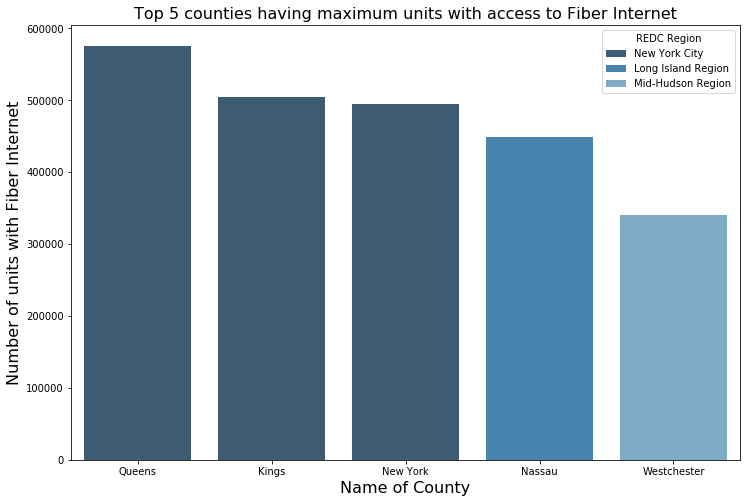

In [10]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="County", y="# Hse Units Fiber",hue  = 'REDC Region',data=county_top, palette="Blues_d", dodge = False) ##plotting for top 5
plt.xlabel('Name of County', fontsize=16)
plt.ylabel('Number of units with Fiber Internet', fontsize=16)
plt.title('Top 5 counties having maximum units with access to Fiber Internet', fontsize=16)
plt.show()

From the above plot, we can infer that the top 3 of the top 5 counties are from the 3 boroughs of New York City. These are Queens, Brooklyn and Manhattan. Next two are from Long Island Region and MId-Hudson Region. 

Let us also look at the REDC Regions separately and find the top 5 REDC Regions by calculating the average Number of Units having access to Fiber internet in a REDC Region. 

In [11]:
data_county_redc = data_county.groupby(['REDC Region']).agg({'# Hse Units Fiber': 'mean'}).reset_index()  ##group by redc region and mean because number of records are not same
data_county_redc_plot = data_county_redc.sort_values('# Hse Units Fiber',ascending = False).head(5)

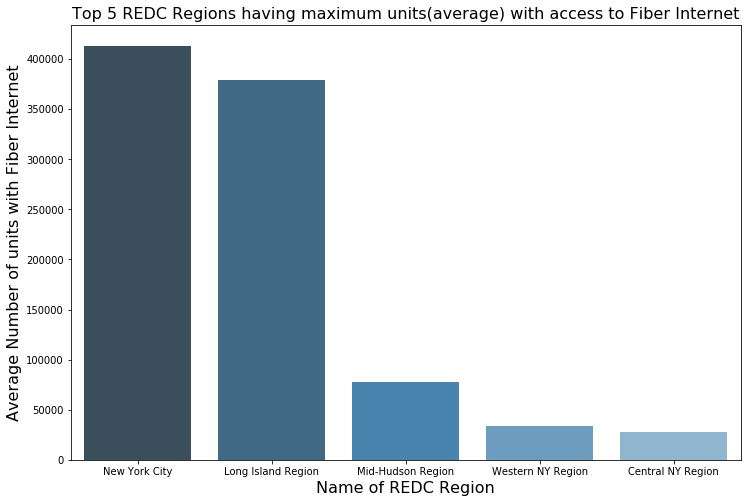

In [12]:
plt.figure(figsize=(12,8)) ##top 5 based on REDC Regions
plt.title('Top 5 REDC Regions having maximum units(average) with access to Fiber Internet', fontsize=16)
ax = sns.barplot(x="REDC Region", y="# Hse Units Fiber",data=data_county_redc_plot, palette="Blues_d", dodge = False)
plt.xlabel('Name of REDC Region', fontsize=16)
plt.ylabel('Average Number of units with Fiber Internet', fontsize=16)
plt.show()

So from the bar plot above, we can confirm that if we look into the REDC Regions, New York City has the maximum number of units with access to high speed fiber internet followed by Long Island Region, Mid-Houdson region, Western NY Region and Central NY Region. 

Next, we will find the counties the do not having a single unit with fiber internet.

In [13]:
county_no_fiber = filter_data(data_county, '# Hse Units Fiber',0, True)##finding number of records for no fiber internet
len(county_no_fiber)

32

From the above output, we get a surprising result. Out of the 62 counties we have, 32 of them do not have a single unit with access to high speed fiber internet. What could be the reason for this? Do they not have a fiber service provider? Let's try to answer this question.

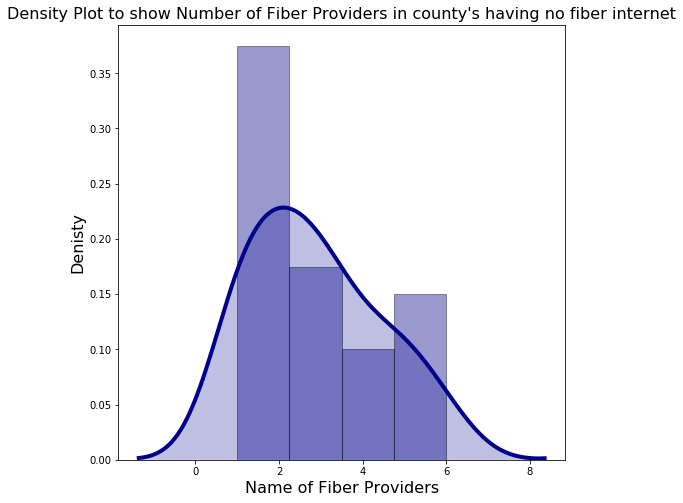

In [14]:
plt.figure(figsize=(8,8)) ##Density plot to show number of providers
sns.distplot(county_no_fiber['# Fiber Providers'], hist=True, kde=True,color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'shade': True})
plt.xlabel('Name of Fiber Providers', fontsize=16)
plt.ylabel('Denisty', fontsize=16)
plt.title("Density Plot to show Number of Fiber Providers in county's having no fiber internet",fontsize=16)
plt.show()

From the above Density Plot for the number of Fiber Providers in those 32 counties that did not have any units with access to fiber internet, we can infer that there is not a single county that does not have a fiber internet provider. Every county has atleast 2 fiber internet providers. So, what could be the reason for no fiber connections? Maybe the people are happy with their cable or DSL services and are not looking for faster internet. For these 32 counties, let's see what services are mostly preferred out of DSL and Cable.  

In [15]:
county_no_fiber['REDC Region'].value_counts() ##getting value counts of no fiber records

Finger Lakes Region     9
Mohawk Valley Region    6
Southern Tier Region    5
Western NY Region       4
Central NY Region       3
North Country Region    2
Mid-Hudson Region       2
Capital Region          1
Name: REDC Region, dtype: int64

From the above output, we can infer that Finger Lakes Region has most records of 0 households units with access to fiber internet followed by Mohawk Valley Region, Souther Tier Region, Western NY Region, Central NY Region, North Coutnry Region, Mid- Hudston Region and Capital Region. We can also infer that Mid Hudson Region, central NY region, Western NY Region have 2,3,4 counties with 0 households units,respectively with access to fiber internet. These 3 REDC Regions were also part of the maximum average units with access to fiber internet.This means that in Mid Hudson Region, Central NY Region and Western NY Region, households have mixed connections from DSL, Cable and fiber.

In [16]:
data_redc_nofib_cable = county_no_fiber.groupby(['REDC Region']).agg({'# Hse Units Cable': 'mean'}).reset_index()
data_redc_nofib_dsl = county_no_fiber.groupby(['REDC Region']).agg({'# Hse Units DSL': 'mean'}).reset_index()
data_redc_nofib_merge = pd.merge(data_redc_nofib_cable,data_redc_nofib_dsl, on = 'REDC Region', how = "inner")
data_redc_nofib_merge
##average DSL and Cable

,REDC Region,# Hse Units Cable,# Hse Units DSL
0,Capital Region,63100.000000,63200.000000
1,Central NY Region,30566.666667,30766.666667
2,Finger Lakes Region,54744.444444,53255.555556
3,Mid-Hudson Region,62550.000000,53250.000000
4,Mohawk Valley Region,33100.000000,33533.333333
5,North Country Region,4855.000000,8250.000000
6,Southern Tier Region,39060.000000,39160.000000
7,Western NY Region,48675.000000,48500.000000


From the table above, we can infer that the for the 32 counties we found that have no access to fiber internet, they have a good amount of households that have access to cable and DSL. There could be a lot of reasons for them to not move to a cheaper and faster internet. They are either comfortable with their current plan and they do not want to change it or they do not have a demand for faster speed and are happy with their current speed.

Now, let's see how population, number of household units and area can help us find any relation with high speed fiber internet. For all the counties we have, we will find the average population, household units and area.

In [17]:
data_aggregate_redc = data_county.groupby(['REDC Region']).agg({'2010 Muni Population': 'mean', '2010 Muni Housing Units': 'mean', 'Muni Area (sq mi)': 'mean'}).reset_index() 
data_aggregate_redc 

,REDC Region,2010 Muni Population,2010 Muni Housing Units,Muni Area (sq mi)
0,Capital Region,1.349009e+05,63202.625000,666.637500
1,Central NY Region,1.583878e+05,68955.600000,849.920000
2,Finger Lakes Region,1.352396e+05,58721.111111,750.733333
3,Long Island Region,1.416441e+06,519165.500000,1409.600000
4,Mid-Hudson Region,3.272644e+05,128798.428571,680.585714
5,Mohawk Valley Region,8.335917e+04,39532.333333,882.550000
6,New York City,1.635027e+06,674212.400000,93.940000
7,North Country Region,6.188471e+04,31528.857143,1771.328571
8,Southern Tier Region,8.223862e+04,38383.875000,781.387500
9,Western NY Region,2.799354e+05,130653.000000,1246.600000


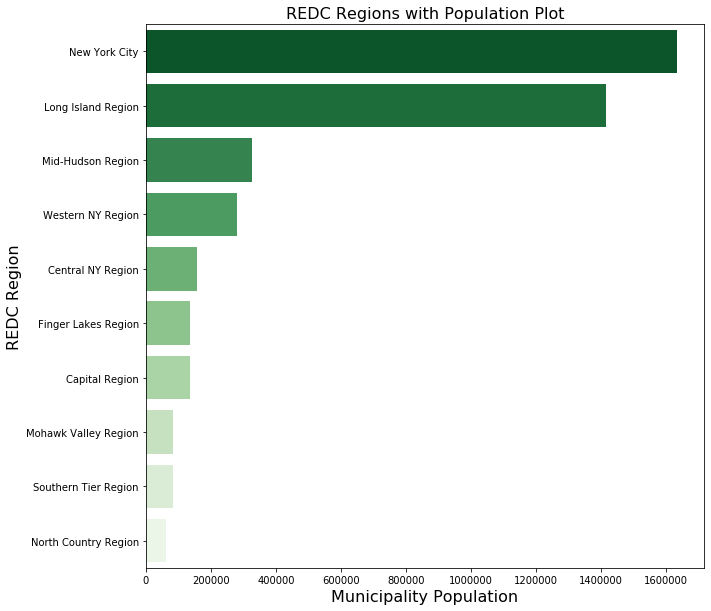

In [18]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x="2010 Muni Population", y="REDC Region",data=data_aggregate_redc.sort_values("2010 Muni Population",ascending = False), palette = "Greens_r")

plt.xlabel('Municipality Population', fontsize=16)
plt.ylabel('REDC Region', fontsize=16)
plt.title('REDC Regions with Population Plot', fontsize=16)
plt.show()

From our analysis that we did above, we found that New York City, Long Island Region, Mid-Hudson Region and Western NY Region were the REDC Regions with the maximum amount of households with access to fiber internet. From the above population plot, we can see that these are the regions have the maximum population also. Hence, we can say that, with more population, the demand increases for high speed internet. 

Next, we will see if housing units has an effect on fiber connections.

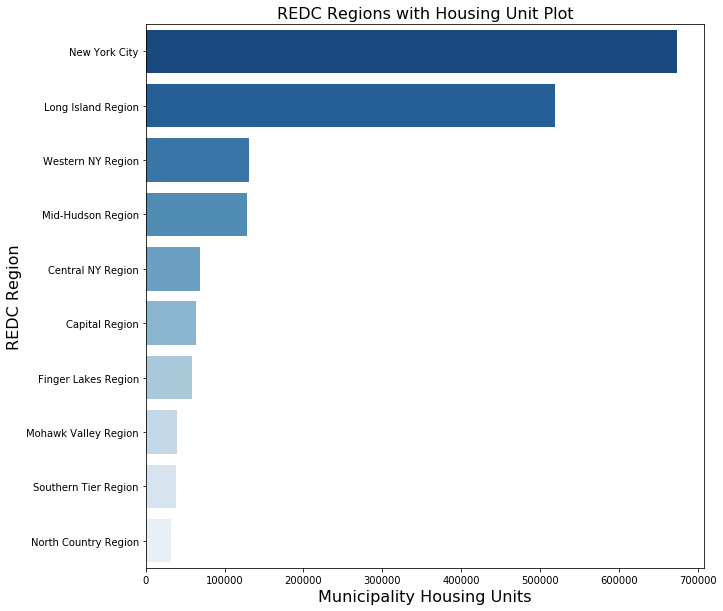

In [19]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x="2010 Muni Housing Units", y="REDC Region",data=data_aggregate_redc.sort_values("2010 Muni Housing Units",ascending = False),palette="Blues_r")
plt.xlabel('Municipality Housing Units', fontsize=16)
plt.ylabel('REDC Region', fontsize=16)
plt.title('REDC Regions with Housing Unit Plot', fontsize=16)
plt.show()

The plot above is very similar to the population plot as it gives us a very similar result. Again the same REDC regions(New York City, Long Island Region, Mid-Hudson Region and Western NY Region) have the maximum number of housing units and these were the ones having maximum fiber connections as well. Hence, if housing units increase, the demand forfiber internet increases as well.

Next, we will see if muncipality area has an effect on fiber internet connections.

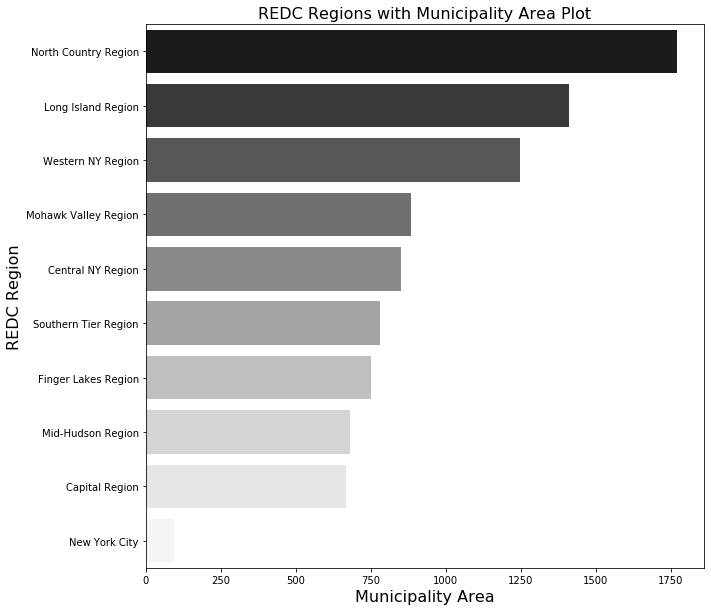

In [20]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x="Muni Area (sq mi)", y="REDC Region",data=data_aggregate_redc.sort_values("Muni Area (sq mi)",ascending = False),palette="Greys_r")
plt.xlabel('Municipality Area', fontsize=16)
plt.ylabel('REDC Region', fontsize=16)
plt.title('REDC Regions with Municipality Area Plot', fontsize=16)
plt.show()

From the above plot, North Country Region has the most area in terms of squared miles whereas New York City has the least area. However, we know that New York City has the maximum population, housing units and fiber internet connections as well. Hence, Municipality area is not a feature through which we can say much about the fiber internet connections. 

From the above visualizations, we have found that some REDC Regions have households that have acess to fiber internet whereas some REDC Regions have households that are still using cable or DSL internets.

Based on the REDC Regions we found, let's see which counties are in those REDC Regions. 

In [21]:
columns_view = ['Municipality Type','2010 Muni Population','2010 Muni Housing Units','Muni Area (sq mi)','County','REDC Region','# Hse Units Cable','# Hse Units DSL','# Fiber Providers','# Hse Units Fiber']           
data_nyc = filter_data(data_county,'REDC Region','New York City', True)
data_nyc = select_cols(data_nyc,columns_view)
data_nyc

,Municipality Type,2010 Muni Population,2010 Muni Housing Units,Muni Area (sq mi),County,REDC Region,# Hse Units Cable,# Hse Units DSL,# Fiber Providers,# Hse Units Fiber
0,County,1385108,511896,57.5,Bronx,New York City,496000,496000,4,322000
1,County,2504700,1000293,97.1,Kings,New York City,970000,970000,6,505000
2,County,1585873,847090,33.8,New York,New York City,820000,821000,8,495000
3,County,2230722,835127,179.0,Queens,New York City,809000,808000,5,576000
4,County,468730,176656,102.3,Richmond,New York City,171000,171000,3,169000


The above table gives us all the counties of New York City Region namely Bronx, Kings(Brooklyn), New York(Manhattan), Queens and Richmond(Staten Island). These are the counties that are growing in terms of fiber internet speed and companies such as verizon and At&T are establishing their monopoly in. 

Next, we will look at the second best region where internet providers are doing a good job in terms of moving from DSL, Cable to fiber internet.

In [22]:
data_LI = filter_data(data_county,'REDC Region','Long Island Region', True)
data_LI = select_cols(data_LI,columns_view)
data_LI 

,Municipality Type,2010 Muni Population,2010 Muni Housing Units,Muni Area (sq mi),County,REDC Region,# Hse Units Cable,# Hse Units DSL,# Fiber Providers,# Hse Units Fiber
0,County,1339532,468346,446.6,Nassau,Long Island Region,454000,451000,5,449000
1,County,1493350,569985,2372.6,Suffolk,Long Island Region,547000,517000,5,309000


From the above table, we get the 2 counties in the Long Island Region. The two counties are Nassau and Suffolk and the long island region is also growing in terms of fiber internet connections.

In [23]:
data_mh = filter_data(data_county,'REDC Region','Mid-Hudson Region', True)
data_mh = select_cols(data_mh,columns_view)
data_mh

,Municipality Type,2010 Muni Population,2010 Muni Housing Units,Muni Area (sq mi),County,REDC Region,# Hse Units Cable,# Hse Units DSL,# Fiber Providers,# Hse Units Fiber
0,County,297488,118638,824.5,Dutchess,Mid-Hudson Region,115000,104000,5,54800
1,County,372813,137025,837.7,Orange,Mid-Hudson Region,132000,129000,4,26400
2,County,99710,38224,246.0,Putnam,Mid-Hudson Region,37000,31100,4,26400
3,County,311687,104057,199.3,Rockland,Mid-Hudson Region,100000,95000,5,97500
4,County,77547,49186,996.0,Sullivan,Mid-Hudson Region,45600,35100,2,0
5,County,182493,83638,1160.6,Ulster,Mid-Hudson Region,79500,71400,5,0
6,County,949113,370821,500.0,Westchester,Mid-Hudson Region,359000,351000,6,341000


The table above gives us the counties of Mid Hudson Region. We can infer that the Doutchess, Orange, Putnam, Rockland and Wstchester has a lot of households with access to fiber internet whereas as Sullivan and Ulster have 0 households with access to fiber internet. If we look into Sullivan county, the population and housing units are very less as compared to the other counties in Mid Houston Region which could be a reason for no fiber internet connections. Now, coming to ulstet county, the population and housing units are not that low as compared to sulliva. Also, they have 5 fiber providers and no fiber connections is a big question here. It could be due to people not wanting to move as they might not be having demands to move to a higher speed internet connection.

In [24]:
data_fl = filter_data(data_county,'REDC Region','Finger Lakes Region', True)
data_fl = select_cols(data_fl,columns_view)
data_fl

,Municipality Type,2010 Muni Population,2010 Muni Housing Units,Muni Area (sq mi),County,REDC Region,# Hse Units Cable,# Hse Units DSL,# Fiber Providers,# Hse Units Fiber
0,County,60079,25589,495.7,Genesee,Finger Lakes Region,23700,21500,3,0
1,County,65393,27123,640.6,Livingston,Finger Lakes Region,23600,25200,3,0
2,County,744344,320593,1384.5,Monroe,Finger Lakes Region,310000,308000,4,0
3,County,107931,48193,662.5,Ontario,Finger Lakes Region,43900,44400,4,0
4,County,42883,18431,814.2,Orleans,Finger Lakes Region,17400,11800,1,0
5,County,35251,16043,390.4,Seneca,Finger Lakes Region,12500,13100,3,0
6,County,93772,41057,1396.2,Wayne,Finger Lakes Region,37700,32400,6,0
7,County,42155,17970,596.7,Wyoming,Finger Lakes Region,14500,12000,2,0
8,County,25348,13491,375.8,Yates,Finger Lakes Region,9400,10900,3,0


The table above gives us all the counties in Finger Lankes Region and we can infer that they have no households with access to fiber internet. It is definitely not because of number of fiber providers. If we look in counties such as Wyoming, Monroe and Ontorio, they have atleast 4 Fiber providers but people are still not using fiber internet. It could be due to people's neglegence or the advertisement stratergies were not upto the mark in 2010.

In [25]:
data_mv = filter_data(data_county,'REDC Region','Mohawk Valley Region', True)
data_mv = select_cols(data_mv,columns_view)
data_mv

,Municipality Type,2010 Muni Population,2010 Muni Housing Units,Muni Area (sq mi),County,REDC Region,# Hse Units Cable,# Hse Units DSL,# Fiber Providers,# Hse Units Fiber
0,County,55531,28562,532.6,Fulton,Mohawk Valley Region,25100,26300,1,0
1,County,64519,33381,1456.3,Herkimer,Mohawk Valley Region,26300,28100,2,0
2,County,50219,23063,410.0,Montgomery,Mohawk Valley Region,18900,21400,1,0
3,County,234878,104180,1256.5,Oneida,Mohawk Valley Region,95800,94400,3,0
4,County,62259,30777,1014.1,Otsego,Mohawk Valley Region,22500,20100,1,0
5,County,32749,17231,625.8,Schoharie,Mohawk Valley Region,10000,10900,2,0


The table above gives us the counties of Mohawk Valley Region. Again, these are the counties with no households with high speed fiber internet. It could be due to people not wanting to move from DSL or Cable internet or the advertisement stratergies were not good enough in 2010.

**Testing Hypotheses**

One-tailed Independent t-test

In [26]:
data_county.describe()

,2010 Muni Population,2010 Muni Housing Units,Muni Area (sq mi),# Cable Providers,# Hse Units Cable,# of DSL Providers,# Hse Units DSL,# Fiber Providers,# Hse Units Fiber
count,6.200000e+01,6.200000e+01,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,3.125500e+05,1.307759e+05,880.177419,1.806452,122645.322581,3.080645,119838.709677,3.822581,61601.451613
std,5.323563e+05,2.148547e+05,567.564935,0.955377,209591.382892,1.309466,207611.778587,1.971304,140471.140538
min,4.836000e+03,8.694000e+03,33.800000,1.000000,710.000000,1.000000,6500.000000,1.000000,0.000000
25%,5.124350e+04,2.638575e+04,496.775000,1.000000,19425.000000,2.000000,21425.000000,2.000000,0.000000
50%,9.130100e+04,4.108400e+04,809.650000,1.500000,36850.000000,3.000000,33500.000000,4.000000,0.000000
75%,2.310602e+05,1.028228e+05,1247.900000,2.000000,95675.000000,4.000000,93800.000000,5.000000,23925.000000
max,2.504700e+06,1.000293e+06,2818.800000,4.000000,970000.000000,7.000000,970000.000000,9.000000,576000.000000


The above analysis shows that despite the increase in the number of Fiber Internet providers, there were household units in 32 counties that had no fiber internet service at all. The summary statistics show that there were 61602 approx. mean number of households with fiber internet services, whereas there were 122645 mean number of housing units with Cable and 119839 mean number of households with DSL. However, considering faster internet services provided by Fiber providers, at the price of cable and DSL services, it makes sense to have a higher subscription for Fiber. We can test our claim using a one-tailed independent t-test to ascertain if the number of fiber housing units were significantly higher than DSL housing units. Similarly, we perform a t-test to check the significance of difference between the number of Cable housing units and Fiber housing units.

Formulation of Hypothesis

H0: µ1 ≤ µ2 <br>
Ha: µ1 >  µ2 (claim) <br> 
; where µ1 = Mean number of housing units with Fiber <br>
        µ2 = Mean number of housing units with DSL

**Null Hypothesis:** The number of housing units with fiber providers is less than equal to the number of housing units with DSL providers <br>
**Alternative Hypothesis:(claim)** The number of housing units with fiber providers is greater than the number of housing units with DSL providers    

In [27]:
weightstats.ttest_ind(x1=data_county['# Hse Units Fiber'], x2=data_county['# Hse Units DSL'], alternative='larger', usevar="unequal")

(-1.8293494466422549, 0.964936306700361, 107.17395697717244)


Interpretation t-test statistic = -1.829 
p-value = 0.965 
Degree of freedom = 107 (round-down) 
As the p-value 0.965 > 0.1, 0.05, 0.01, we accept the Null Hypothesis which states that the number of housing units with Fiber providers is less than or equal to the number of housing units with DSL providers. Thus, our result is significant at 0.1, 0.05 and 0.01 level of significance. 


H0: µ1 ≤ µ2 
Ha: µ1 > µ2 (claim) 
; where µ1 = Mean number of housing units with Fiber 
µ2 = Mean number of housing units with Cable

In [28]:
weightstats.ttest_ind(x1=data_county['# Hse Units Fiber'], x2=data_county['# Hse Units Cable'], alternative='larger', usevar="unequal")

(-1.9050318576257248, 0.9702646547326533, 106.60013770210558)


Interpretation t-test statistic = -1.91 
p-value = 0.97 
Degree of freedom = 106 (round-down) 
As the p-value 0.97 > 0.1, 0.05, 0.01, we accept the Null Hypothesis which states that the number of housing units with Fiber providers is less than or equal to the number of housing units with cable providers. Thus, our result is significant at 0.1, 0.05 and 0.01 level of significance. 

As Fiber Internet service providers such as AT&T and Verizon captured the Internet market in the state of New York, it seems logical that the number of fiber internet service providers were greater than DSL and Cable providers. The summary statistic also shows that there were 3.8 number of fiber internet providers, on an average, in the state of New York which is higher than 3.08 average number of DSL and 1.81 average number of cable providers. However, we must test if our claim is significant or not.

H0: µ1 ≤ µ2 
Ha: µ1 > µ2 (claim) 
; where µ1 = Mean number of Fiber providers 
µ2 = Mean number of DSL providers


Null Hypothesis: The number of fiber providers is less than equal to the number o DSL providers 
Alternative Hypothesis:(claim) The number fiber providers is greater than the number DSL providers 

In [29]:
weightstats.ttest_ind(x1=data_county['# Fiber Providers'], x2=data_county['# of DSL Providers'], alternative='larger', usevar="unequal")

(2.468534875602321, 0.007582056112676577, 106.05913018437622)

Interpretation t-test statistic = 2.47 
p-value = 0.0076 
Degree of freedom = 106 (round-down) 
As the p-value 0.007 < 0.1, 0.05, 0.01, we reject the Null Hypothesis which states that the number Fiber providers is less than or equal to the number of DSL providers. Thus, our result is significant at 0.1, 0.05 and 0.01 level of significance. Hence, the number of fiber providers in the state of New York are significantly higher than the number of DSL providers. 

H0: µ1 ≤ µ2 
Ha: µ1 > µ2 (claim) 
; where µ1 = Mean number of Fiber providers 
µ2 = Mean number of Cable providers

Null Hypothesis: The number of fiber providers is less than equal to the number of cable providers 
Alternative Hypothesis:(claim) The number fiber providers is greater than the number cable providers 

In [30]:
weightstats.ttest_ind(x1=data_county['# Fiber Providers'], x2=data_county['# Cable Providers'], alternative='larger', usevar="unequal")

(7.246838454456601, 7.713741072617268e-11, 88.15691739690735)

**Interpretation**
t-test statistic = 7.25 
p-value = 0.0076 
Degree of freedom = 106 (round-down) 
As the p-value 7.713741072617268e-11 < 0.1, 0.05, 0.01, we reject the Null Hypothesis which states that the number of Fiber providers is less than or equal to the number cable providers. Thus, our result is significant at 0.1, 0.05 and 0.01 level of significance. Hence, the number of fiber providers in the state of New York are significantly higher than the number of cable providers. 

## 1.5 Predictive Analytics

Based on the relationships explored in the EDA section, we can predict the number of housing units with fiber providers using 2010 Municipal Housing Units, 2010 Municipal Population, Municipal Area (sq mi), Number of Cable Providers, Number of housing units with cable, Number of DSL Providers and Number of housing units with DSL providers.

In [31]:
train, test = train_test_split(data_county, test_size=0.2)

In [32]:
#Performing the Multiple Linear Regression
X = data_county[['2010 Muni Housing Units','2010 Muni Population','Muni Area (sq mi)','# Cable Providers','# Hse Units Cable','# of DSL Providers','# Hse Units DSL']] # here we have 7 predictor variables for multiple regression. 
Y = data_county['# Hse Units Fiber']

In [33]:
# splitting the dataframe into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=9)

In [34]:
df_pred = LinearRegressionM(X_train, X_test, y_train, y_test) ##custom function created for Linear Regression
df_pred

,Actual,Predicted
34,0,6490.789751
14,169000,220467.206538
6,0,-6402.122882
7,0,17751.251625
36,0,-13001.938819
2,322000,384217.182026
43,97500,75699.910703
37,0,-8692.957932
23,505000,687439.921931
48,0,-3719.725109


In [35]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, df_pred['Predicted'])))
print('R Squared value:', metrics.r2_score(y_test, df_pred['Predicted']))

Root Mean Squared Error: 57903.34809838661
R Squared value: 0.8548173963486002


RMSE of 57903.35 indicates that the average distance between the observed and the predicted values is 57903.35 or on average, the observed number of housing units with fiber internet lie 57903.35 away from the predicted housing units with fiber internet.

R-Squared value of 0.85 indicates that a 85 % variation in our dependent variable, Number of housing units with fiber internet, is explained using our predictor variables (independent variables).

# Conclusion

Through this data, based on our analysis of Fiber Internet services in the state of New York, we found that REDC Regions such as New York City and Long Island Region were having the maximum amount housing units with access to fiber internet in 2010. Some REDC Regions such as Central NY Region, Western NY Region and Mid-Hudson NY region had some counties that did not have a single housing unit with access to fiber internet whereas as some counties had housing units with access to fiber internet. However, some REDC regions such as finger lakes and Mohawk Valley did not have a single county with housing units having access to fiber internet. We further performered a one-tailed T test for testing the claim if the introduction of fiber internet led to a more number of housing units with fiber internet as compared to cable and DSL internet access. We found that there was no significance of our claim and hence, the number of housing units fiber units provider is less than equal to housing units with Cable and DSL. Similarly, we performed another one-tailed T test to test the claim if the average number of fiber internet providers were greater than the average number of DSL and cable providers. We found that the number of fiber internet providers were significantly greater than cable and dsl internet providers. This statistical testing confirms with our Visualizations and Analysis. Finally, we predicted the number of housing units with access to fiber internet using linear regressiona which gave us a R-Squared value of 0.85 which indicates that a 85 % variation in our dependent variable, Number of housing units with fiber internet, is explained using our predictor variables (independent variables). The reason why the number of housing units with fiber internet is lower in few REDC regions or counties is because of people's negligence or unwillingness to shift from their tradition internet services to faster internet services like a fiber internet. It is important to note that there are many fiber service providers but maybe they are not advertising well which is why people are unaware of fiber internet service.